In [1]:
import json
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import itertools

In [2]:
with open('dataset.json', 'r') as file:
    data = json.load(file)

print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
len(data)

16455

In [4]:
# extract images of one restaurant
one_restaurant_info=data[0]['more_details']['full_images']
one_restaurant_images=[i['image_id'] for i in one_restaurant_info]
one_restaurant_images

['2088757', '2182000', '4151606', '4151588', '2224983']

In [5]:
# do this for all restaurants

res_image_dic={}
for res in data:
    res_id=res['identifier']
    one_restaurant_info=res['more_details']['full_images']
    one_restaurant_images=[i['image_id'] for i in one_restaurant_info]
    res_image_dic[res_id]=one_restaurant_images

In [6]:
# check if restaurant ids are unique
len(list(res_image_dic.keys()))== len(set(res_image_dic.keys()))

True

In [7]:
# list of all restaurant images
nested_list=list(res_image_dic.values())
image_names = list(itertools.chain(*nested_list))
#image_names

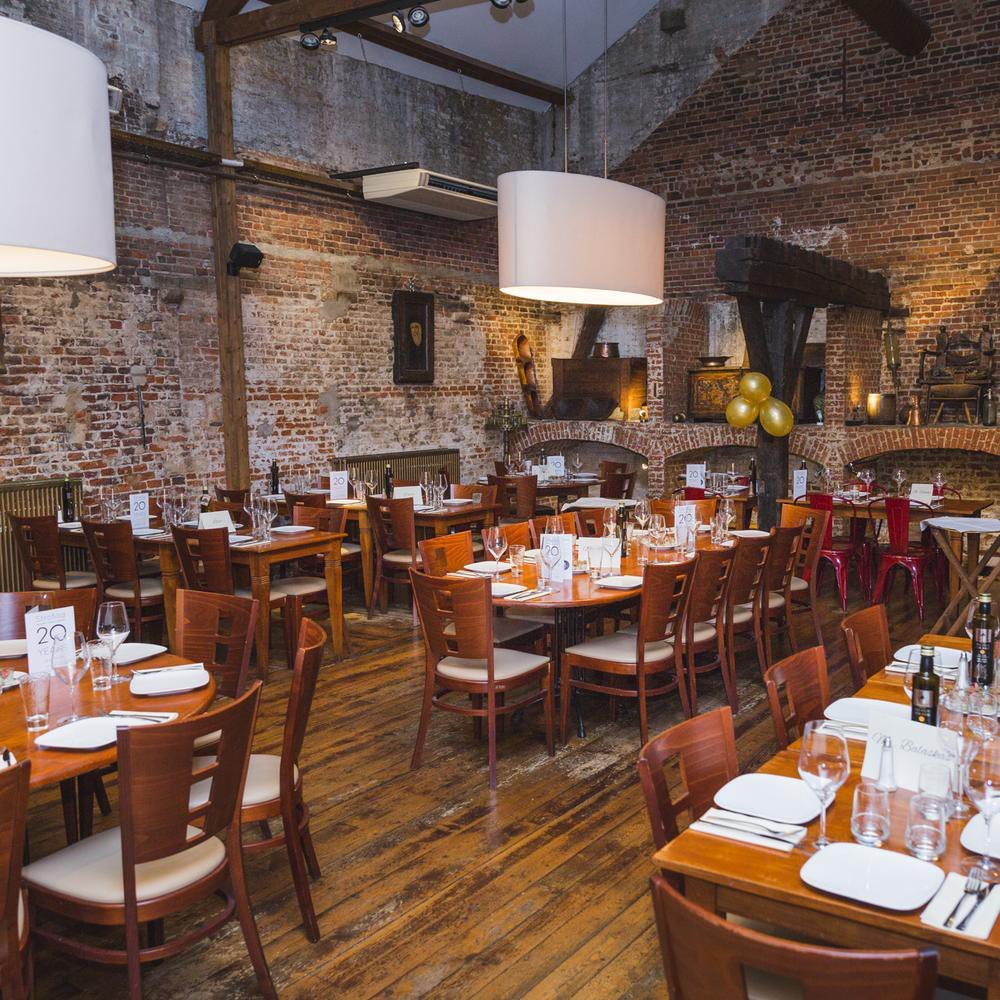

In [8]:
# test reading an image
folder_path = 'images'
image_path=folder_path + '/' + '4151606' + '.jpg'
img=Image.open(image_path)
img

In [9]:
# reading all images in a restaurant setting 
all_images={}
folder_path = 'images'
target_size = (256, 256) # need to resize because some images do not have the same shap

iteration=0 # read only 100 images for now
for name in image_names:
    iteration+=1
    file_name=name + '.jpg'
    image_path = folder_path + '/' + file_name
    if iteration <=100:
        try:
            with Image.open(image_path) as img:
                img = img.resize(target_size)
                image_array = np.array(img)

                all_images[name]=image_array
            #print(name)
        except:
            print(f"Error opening file '{file_name}', skipping...")
            continue

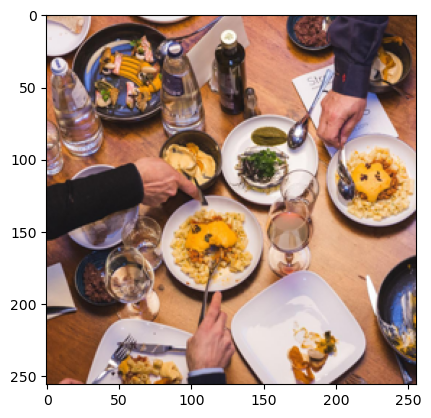

In [10]:
# plot one image based on id
plt.imshow(all_images['2182000'], cmap='gray')
plt.show()

In [11]:
# add manual label
selected_ids=(list(all_images.keys()))
label_ids=selected_ids[:20] # should change to random select just in case there is corr
no_label_ids=selected_ids[20:]

train_image_list=[]
for i in label_ids: # show images in order to label them 
    #plt.imshow(all_images[i], cmap='gray')
    #plt.show()
    train_image_list.append(all_images[i])
    #print(all_images[i].shape) 

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [12]:
test_image_list=[]
for i in no_label_ids: 
    test_image_list.append(all_images[i])
   # print(all_images[i].shape) 

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [13]:
# use 0 for food, 1 for interiror
label_ids = [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
len(label_ids)

20

In [14]:
sum(label_ids) # there is a slight imbalance

12

In [15]:
train=np.array(train_image_list)
train.shape

(20, 256, 256, 3)

In [16]:
test=np.array(test_image_list)
test.shape

(80, 256, 256, 3)

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16

# Load the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze pre-trained layers (compare with no freezing)
for layer in base_model.layers:
    layer.trainable = False

# Define your own classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-04-02 20:12:26.016643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 20:12:32.925027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,909,249
Trainable params: 4,194,561
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
# Load your own training and test data (new result if freeze previous layers)
train_images = train[:10]
train_labels = np.array(label_ids[:10])
test_images = train[10:]
test_labels = np.array(label_ids[10:])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model on test set
score = model.evaluate(test_images, test_labels)
print('Test accuracy:', score[1])

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 11.6925 - accuracy: 0.1000 - val_loss: 7.0949e-12 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6131e-15 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.2123e-17 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.7736e-19 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.5922e-21 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.4389e-22 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.0373e-23 - val_accur

In [20]:
# look at the images without labels, check if predicted correctly
new_images = test[:10]

In [21]:
# Predict new images with the model
model_predictions=model.predict(new_images)
# set the threshold
threshold = 0.5
# convert predicted probabilities to labels 0 and 1
predicted_labels = (model_predictions > threshold).astype(int)
# print the predicted labels

1/1 [==============================] - 2s 2s/step


In [22]:
label_dict={0: 'food', 1: 'exterior'}

label:food


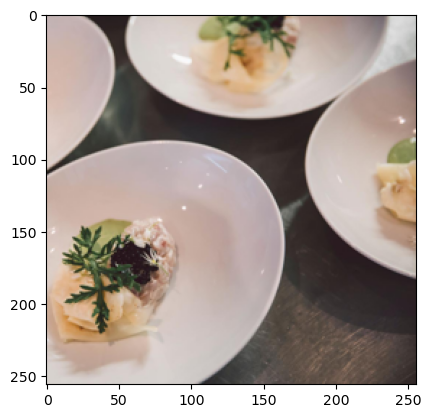

label:food


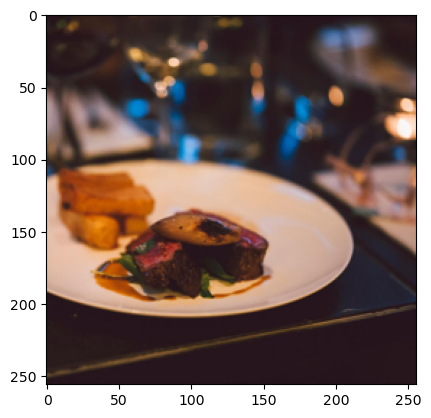

label:exterior


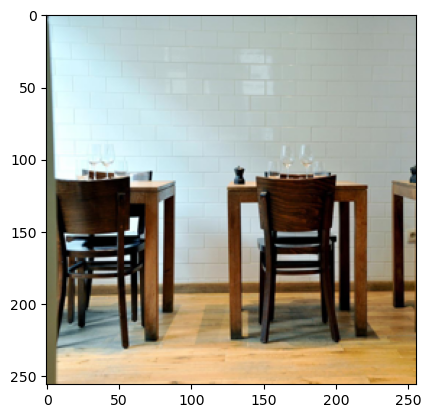

label:exterior


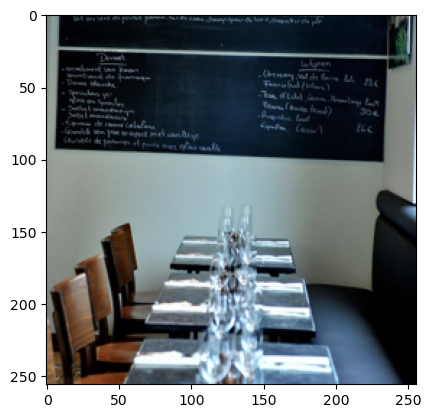

label:exterior


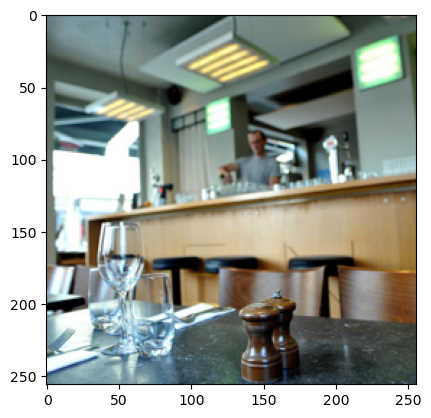

label:exterior


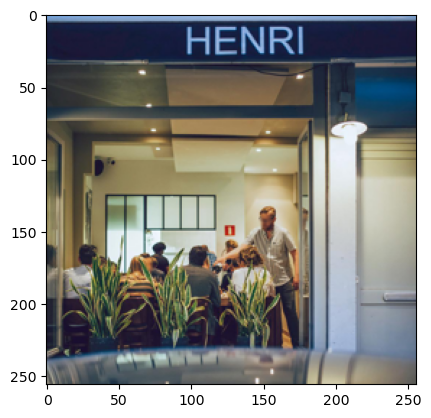

label:food


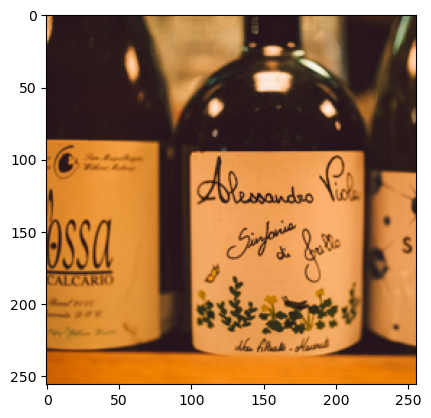

label:exterior


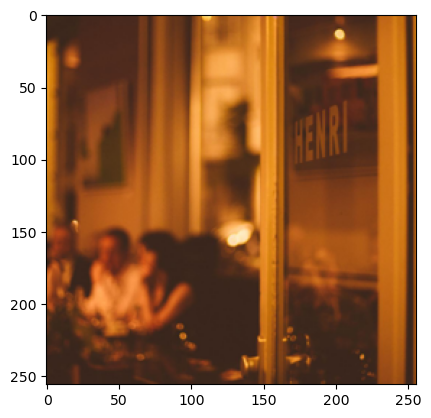

label:exterior


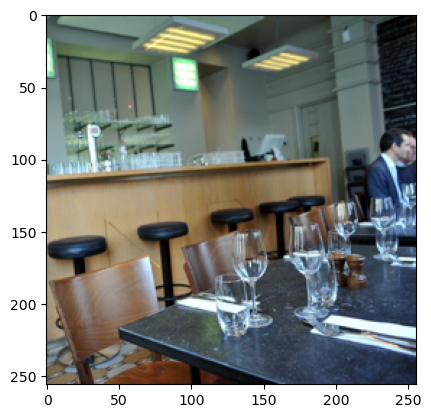

label:food


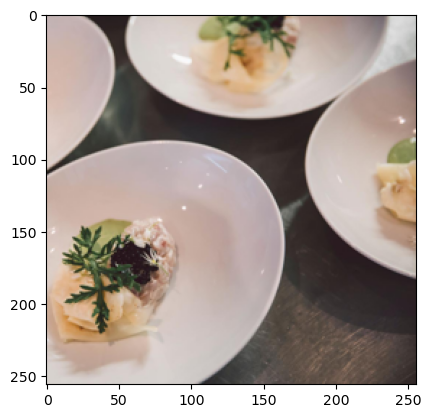

In [23]:
for ind, item in enumerate(new_images): # show images in order to check prediction 
    label=predicted_labels[ind][0]
    print('label:' + (label_dict[label]))
    plt.imshow(item, cmap='gray')
    plt.show() # only one is misclassified? (the wine bottle should be exterior?)